# Observations

Deze stap verkent de data en doet de opkuis. Details zijn terug te vinden in de "cleaning" sectie.</br> 
Het resultaat van de clean data wordt geschreven naar een .parquet file, zodat de datatypes behouden blijven.

In [2]:
import pandas as pd
import re
import numpy as np

# set the max columns to none
pd.set_option('display.max_columns', None)
# set the max columns to none
pd.set_option('display.max_rows', None)

In [3]:
species_id =70  # 70 boomklever, 116 halsbandparkiet

## Data exploring

In [4]:
file_observations = f'../1_scraping/scraped_data/cleaned/observation_details_{species_id}_clean.csv'

# Load the data
df_observations = pd.read_csv(file_observations, header=0, index_col="observation_id")

# Preview
df_observations.head(5)

species_id species_name species_name_scientific  \
observation_id                                                    
336194665             70.0   Boomklever          Sitta europaea   
336207548             70.0   Boomklever          Sitta europaea   
336207346             70.0   Boomklever          Sitta europaea   
336199027             70.0   Boomklever          Sitta europaea   
336207352             70.0   Boomklever          Sitta europaea   

                                          validation  gps_coordinates  \
observation_id                                                          
336194665       Goedgekeurd (automatische validatie)  51.1143, 4.2675   
336207548       Goedgekeurd (automatische validatie)  51.0751, 5.0718   
336207346       Goedgekeurd (automatische validatie)  50.5213, 5.3332   
336199027       Goedgekeurd (automatische validatie)  51.0177, 5.1856   
336207352       Goedgekeurd (automatische validatie)  50.5162, 5.3350   

               accuracy   source              date amount         life_stage  \
observation_id                                                                 
336194665           15m     Site  2024-12-31 15:10      2  adult winterkleed   
336207548           15m     Site  2024-12-31 15:00      1           onbekend   
336207346            5m  ObsMapp  2024-12-31 14:26      1           onbekend   
336199027           18m     iObs        2024-12-31      1           onbekend   
336207352            5m  ObsMapp  2024-12-31 13:56      1           onbekend   

                   activity  location_id                        location  \
observation_id                                                             
336194665       foeragerend      29110.0  Hingene - Schellandpolder (AN)   
336207548       ter plaatse     675306.0     Tessenderlo - Baalberg (LI)   
336207346           roepend      42124.0                Outrelouxhe (LG)   
336199027       ter plaatse      28673.0      Lummen - Laren - Zuid (LI)   
336207352       foeragerend      42124.0                Outrelouxhe (LG)   

                observer_id                 observer_name counting_method  \
observation_id                                                              
336194665           99836.0           Van Osselaer Philip            geen   
336207548          149793.0                  Elly Gombeer            geen   
336207346           43403.0  Jean-Sébastien Rousseau-Piot        onbekend   
336199027          118615.0                R. Vansweevelt        onbekend   
336207352           43403.0  Jean-Sébastien Rousseau-Piot        onbekend   

                           method  
observation_id                     
336194665       gezien en gehoord  
336207548                  gezien  
336207346                 gehoord  
336199027                onbekend  
336207352                onbekend

In [5]:
df_observations.index

Index([336194665, 336207548, 336207346, 336199027, 336207352, 336193003,
       336188047, 336193038, 336193048, 336197798,
       ...
        45654126,  45654069,  68459523,  41660038,  41659963,  74938220,
        62234945,  96686569,  43875950,  47673787],
      dtype='int64', name='observation_id', length=277029)

In [6]:
df_observations.info()

<class 'pandas.core.frame.DataFrame'>
Index: 277029 entries, 336194665 to 47673787
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   species_id               277029 non-null  float64
 1   species_name             277029 non-null  object 
 2   species_name_scientific  277029 non-null  object 
 3   validation               277029 non-null  object 
 4   gps_coordinates          269863 non-null  object 
 5   accuracy                 269757 non-null  object 
 6   source                   259132 non-null  object 
 7   date                     277029 non-null  object 
 8   amount                   277029 non-null  object 
 9   life_stage               276552 non-null  object 
 10  activity                 276552 non-null  object 
 11  location_id              272738 non-null  float64
 12  location                 272738 non-null  object 
 13  observer_id              276171 non-null  float64
 14 

In [7]:
df_observations.describe(include='all')

species_id species_name species_name_scientific  \
count   277029.000000       277029                  277029   
unique            NaN            3                       3   
top               NaN   Boomklever          Sitta europaea   
freq              NaN       276537                  276537   
mean       529.815568          NaN                     NaN   
std      10901.305917          NaN                     NaN   
min         70.000000          NaN                     NaN   
25%         70.000000          NaN                     NaN   
50%         70.000000          NaN                     NaN   
75%         70.000000          NaN                     NaN   
max     258978.000000          NaN                     NaN   

                                  validation  gps_coordinates accuracy  \
count                                 277029           269863   269757   
unique                                     5           216560      656   
top     Goedgekeurd (automatische validatie)  50.9686, 5.3391      25m   
freq                                  242999              711    69431   
mean                                     NaN              NaN      NaN   
std                                      NaN              NaN      NaN   
min                                      NaN              NaN      NaN   
25%                                      NaN              NaN      NaN   
50%                                      NaN              NaN      NaN   
75%                                      NaN              NaN      NaN   
max                                      NaN              NaN      NaN   

         source        date  amount life_stage     activity    location_id  \
count    259132      277029  277029     276552       276552  272738.000000   
unique       27      172237     248         20           48            NaN   
top     ObsMapp  2013-04-07       1   onbekend  ter plaatse            NaN   
freq     111400          94  232976     253834       146999            NaN   
mean        NaN         NaN     NaN        NaN          NaN   83370.406775   
std         NaN         NaN     NaN        NaN          NaN  128462.203471   
min         NaN         NaN     NaN        NaN          NaN   23089.000000   
25%         NaN         NaN     NaN        NaN          NaN   28734.000000   
50%         NaN         NaN     NaN        NaN          NaN   31413.000000   
75%         NaN         NaN     NaN        NaN          NaN   72759.000000   
max         NaN         NaN     NaN        NaN          NaN  724090.000000   

                                                 location   observer_id  \
count                                              272738  2.761710e+05   
unique                                               8062           NaN   
top     Eeklo - Het Leen - Noord (4250A) (Prov. Dom. O...           NaN   
freq                                                 4079           NaN   
mean                                                  NaN  8.393163e+04   
std                                                   NaN  9.219410e+04   
min                                                   NaN  1.140000e+02   
25%                                                   NaN  4.088300e+04   
50%                                                   NaN  4.972200e+04   
75%                                                   NaN  9.728500e+04   
max                                                   NaN  1.060523e+06   

       observer_name counting_method    method  
count         276171          277029    277029  
unique          9728               7        18  
top       D. Peeters        onbekend  onbekend  
freq            9265          242533    160932  
mean             NaN             NaN       NaN  
std              NaN             NaN       NaN  
min              NaN             NaN       NaN  
25%              NaN             NaN       NaN  
50%              NaN             NaN       NaN  
75%              NaN             NaN       NaN  


## Cleaning

In [8]:
df_observations_cleaned = df_observations.copy()

### Gps Coördinaten
Bij het ingeven van een observatie op waarnemingen.be kan je ervoor kiezen om geen coördinaten mee te geven. Dit is vooral interessant als het zeldzame soorten betreft en de bescherming belangrijker wordt geacht dan open data.</br>
Hoewel zowel de halsbandparkiet als de boomklever zijn veel voorkomende soorten zijn, zijn er toch nog waarnemingen waar de gps-coördinaten niet meegegeven worden. 
Vermits deze coördinaten crucial zijn in onze oefening, verwijderen we deze observaties uit onze dataset. </br>

De latitude (Noorderbreedte) en longitude (oosterlengte) worden als aparte kolom meegegeven.

In [9]:
# print observations with gps coördinates
df_observations_cleaned[df_observations_cleaned['gps_coordinates'].notnull()].head(5)

species_id species_name species_name_scientific  \
observation_id                                                    
336194665             70.0   Boomklever          Sitta europaea   
336207548             70.0   Boomklever          Sitta europaea   
336207346             70.0   Boomklever          Sitta europaea   
336199027             70.0   Boomklever          Sitta europaea   
336207352             70.0   Boomklever          Sitta europaea   

                                          validation  gps_coordinates  \
observation_id                                                          
336194665       Goedgekeurd (automatische validatie)  51.1143, 4.2675   
336207548       Goedgekeurd (automatische validatie)  51.0751, 5.0718   
336207346       Goedgekeurd (automatische validatie)  50.5213, 5.3332   
336199027       Goedgekeurd (automatische validatie)  51.0177, 5.1856   
336207352       Goedgekeurd (automatische validatie)  50.5162, 5.3350   

               accuracy   source              date amount         life_stage  \
observation_id                                                                 
336194665           15m     Site  2024-12-31 15:10      2  adult winterkleed   
336207548           15m     Site  2024-12-31 15:00      1           onbekend   
336207346            5m  ObsMapp  2024-12-31 14:26      1           onbekend   
336199027           18m     iObs        2024-12-31      1           onbekend   
336207352            5m  ObsMapp  2024-12-31 13:56      1           onbekend   

                   activity  location_id                        location  \
observation_id                                                             
336194665       foeragerend      29110.0  Hingene - Schellandpolder (AN)   
336207548       ter plaatse     675306.0     Tessenderlo - Baalberg (LI)   
336207346           roepend      42124.0                Outrelouxhe (LG)   
336199027       ter plaatse      28673.0      Lummen - Laren - Zuid (LI)   
336207352       foeragerend      42124.0                Outrelouxhe (LG)   

                observer_id                 observer_name counting_method  \
observation_id                                                              
336194665           99836.0           Van Osselaer Philip            geen   
336207548          149793.0                  Elly Gombeer            geen   
336207346           43403.0  Jean-Sébastien Rousseau-Piot        onbekend   
336199027          118615.0                R. Vansweevelt        onbekend   
336207352           43403.0  Jean-Sébastien Rousseau-Piot        onbekend   

                           method  
observation_id                     
336194665       gezien en gehoord  
336207548                  gezien  
336207346                 gehoord  
336199027                onbekend  
336207352                onbekend

In [10]:
# print observations with missing gps coördinates
df_observations_cleaned[df_observations_cleaned['gps_coordinates'].isnull()].head(5)

species_id species_name species_name_scientific  \
observation_id                                                    
336249343             70.0   Boomklever          Sitta europaea   
336181026             70.0   Boomklever          Sitta europaea   
336403644             70.0   Boomklever          Sitta europaea   
335800732             70.0   Boomklever          Sitta europaea   
335799212             70.0   Boomklever          Sitta europaea   

                                          validation gps_coordinates accuracy  \
observation_id                                                                  
336249343       Goedgekeurd (automatische validatie)             NaN      NaN   
336181026       Goedgekeurd (automatische validatie)             NaN      NaN   
336403644       Goedgekeurd (automatische validatie)             NaN      NaN   
335800732       Goedgekeurd (automatische validatie)             NaN      NaN   
335799212       Goedgekeurd (automatische validatie)             NaN      NaN   

                 source        date amount life_stage     activity  \
observation_id                                                       
336249343          iObs  2024-12-31      1   onbekend  ter plaatse   
336181026       ObsMapp  2024-12-30      1   onbekend  ter plaatse   
336403644          Site  2024-12-25      1      adult  ter plaatse   
335800732       ObsMapp  2024-12-25      1   onbekend      roepend   
335799212       ObsMapp  2024-12-25      1   onbekend      roepend   

                location_id  \
observation_id                
336249343           42334.0   
336181026           94479.0   
336403644          138312.0   
335800732           31020.0   
335799212           31019.0   

                                                         location  \
observation_id                                                      
336249343                                             Septon (LX)   
336181026       Maaseik/Dilsen - Schotsheide - Bergerven (LiLa...   
336403644         Lippelo - Marselaer (deelgebied Antwerpen) (AN)   
335800732                         Bekkevoort - Hermansheuvel (VB)   
335799212       Bekkevoort - Begijnbeek tssn E314 en Diestsest...   

                observer_id        observer_name counting_method       method  
observation_id                                                                 
336249343          415733.0  Evrard d'Oultremont        onbekend      gehoord  
336181026          191524.0          user 191524        onbekend     onbekend  
336403644           40533.0       Joost Reyniers            geen  met fotoval  
335800732           41195.0           bart broos        onbekend      gehoord  
335799212           41195.0           bart broos        onbekend      gehoord

In [11]:
# drop observations with missing gps coördinates
df_observations_cleaned = df_observations_cleaned.dropna(subset = ['gps_coordinates']) 

In [ ]:
# add columns for latitude and longitude 
df_observations_cleaned["latitude"] = df_observations_cleaned["gps_coordinates"].apply(lambda x: x.split(', ')[0]) # noorderbreedte
df_observations_cleaned["longitude"] = df_observations_cleaned["gps_coordinates"].apply(lambda x: x.split(', ')[1]) # oosterlengte

### Accuracy
Accuracy bestaat uit strings en floats. We willen de accuracy weergeven datatype float dat de meters weergeeft. De waarden 'onbekend' en NaN worden vervangen door NaN. </br>


In [13]:
df_observations_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 269863 entries, 336194665 to 47673787
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   species_id               269863 non-null  float64
 1   species_name             269863 non-null  object 
 2   species_name_scientific  269863 non-null  object 
 3   validation               269863 non-null  object 
 4   gps_coordinates          269863 non-null  object 
 5   accuracy                 269757 non-null  object 
 6   source                   252058 non-null  object 
 7   date                     269863 non-null  object 
 8   amount                   269863 non-null  object 
 9   life_stage               269397 non-null  object 
 10  activity                 269397 non-null  object 
 11  location_id              265594 non-null  float64
 12  location                 265594 non-null  object 
 13  observer_id              269005 non-null  float64
 14 

In [14]:
df_observations_cleaned[df_observations_cleaned["accuracy"].isnull()].count()

species_id                 106
species_name               106
species_name_scientific    106
validation                 106
gps_coordinates            106
accuracy                     0
source                     106
date                       106
amount                     106
life_stage                 106
activity                   106
location_id                105
location                   105
observer_id                106
observer_name              106
counting_method            106
method                     106
latitude                   106
longitude                  106
dtype: int64

In [15]:
df_observations_cleaned.groupby('accuracy').nunique().head(5)

species_id  species_name  species_name_scientific  validation  \
accuracy                                                                  
1000m              2             2                        2           5   
100m               2             2                        2           5   
101m               1             1                        1           1   
104m               1             1                        1           3   
106m               1             1                        1           1   

          gps_coordinates  source   date  amount  life_stage  activity  \
accuracy                                                                 
1000m                1234       6   1424      25           8        22   
100m                22901      13  11075      51          10        37   
101m                    1       1      1       1           1         1   
104m                    9       2      9       3           1         3   
106m                    1       1      2       2           1         2   

          location_id  location  observer_id  observer_name  counting_method  \
accuracy                                                                       
1000m             671       671          495            493                6   
100m             3299      3297         2426           2412                6   
101m                1         1            1              1                1   
104m                9         9            9              9                3   
106m                1         1            2              2                2   

          method  latitude  longitude  
accuracy                               
1000m          8      1093       1127  
100m          11      9029      13044  
101m           1         1          1  
104m           4         9          9  
106m           1         1          1

In [16]:
def extract_m_accuracy(x):
    if isinstance(x, str) and "m" in x:
        return float(re.findall(r'\d+', x)[0])
    else:
        return np.nan

# Extract and cast accuracy from string to float, handling NaN values
df_observations_cleaned["accuracy_m"] = df_observations_cleaned["accuracy"].apply(lambda x: extract_m_accuracy(x))

In [17]:
df_observations_cleaned[df_observations_cleaned["accuracy_m"].isnull()].head(5)

species_id species_name species_name_scientific  \
observation_id                                                    
336193038             70.0   Boomklever          Sitta europaea   
336193048             70.0   Boomklever          Sitta europaea   
336193166             70.0   Boomklever          Sitta europaea   
336193226             70.0   Boomklever          Sitta europaea   
336193235             70.0   Boomklever          Sitta europaea   

                                          validation  gps_coordinates  \
observation_id                                                          
336193038       Goedgekeurd (automatische validatie)  51.0408, 4.9888   
336193048       Goedgekeurd (automatische validatie)  51.0417, 4.9886   
336193166       Goedgekeurd (automatische validatie)  51.0354, 4.9935   
336193226       Goedgekeurd (automatische validatie)  51.0322, 4.9897   
336193235       Goedgekeurd (automatische validatie)  51.0310, 4.9848   

               accuracy   source              date amount life_stage  \
observation_id                                                         
336193038           NaN  ObsMapp  2024-12-31 13:23      2   onbekend   
336193048           NaN  ObsMapp  2024-12-31 13:15      1   onbekend   
336193166           NaN  ObsMapp  2024-12-31 10:46      4   onbekend   
336193226           NaN  ObsMapp  2024-12-31 10:23      2   onbekend   
336193235           NaN  ObsMapp  2024-12-31 10:16      1   onbekend   

                          activity  location_id  \
observation_id                                    
336193038                  roepend     263728.0   
336193048              ter plaatse     263728.0   
336193166                  roepend     263728.0   
336193226                  roepend     108334.0   
336193235       baltsend / zingend     108334.0   

                                                location  observer_id  \
observation_id                                                          
336193038       Averbode Bos en Heide - Tessenderlo (LI)      40019.0   
336193048       Averbode Bos en Heide - Tessenderlo (LI)      40019.0   
336193166       Averbode Bos en Heide - Tessenderlo (LI)      40019.0   
336193226                     Averbode - De Vijvers (VB)      40019.0   
336193235                     Averbode - De Vijvers (VB)      40019.0   

                 observer_name counting_method   method latitude longitude  \
observation_id                                                               
336193038       Marc Herremans        onbekend  gehoord  51.0408    4.9888   
336193048       Marc Herremans        onbekend   gezien  51.0417    4.9886   
336193166       Marc Herremans        onbekend  gehoord  51.0354    4.9935   
336193226       Marc Herremans        onbekend  gehoord  51.0322    4.9897   
336193235       Marc Herremans        onbekend  gehoord  51.0310    4.9848   

                accuracy_m  
observation_id              
336193038              NaN  
336193048              NaN  
336193166              NaN  
336193226              NaN  
336193235              NaN

In [18]:
df_observations_cleaned["accuracy_m"].value_counts().sort_index(ascending=False)

accuracy_m
1590.0        1
1470.0        1
1414.0        1
1000.0     1807
998.0         6
997.0         1
995.0         1
994.0         1
990.0        50
987.0        11
985.0        52
981.0         4
980.0         4
978.0        32
977.0        47
976.0         9
975.0         1
974.0        21
973.0        17
972.0        14
971.0         3
970.0         9
968.0         1
967.0         1
966.0         3
965.0         1
960.0        36
958.0        10
957.0         4
956.0         2
955.0         2
954.0         1
948.0         1
947.0        16
945.0         1
944.0         4
943.0         2
942.0         3
939.0         1
937.0         3
932.0         2
929.0         2
928.0         5
926.0         3
925.0         2
924.0         1
922.0         3
921.0         2
918.0       329
917.0         1
913.0       417
912.0         1
911.0         2
907.0         4
906.0         3
905.0         1
903.0         1
902.0        12
900.0        15
899.0         3
897.0         1
896.0        

In [19]:
df_observations_cleaned.drop(columns=['accuracy'], inplace=True)

### Datums

De datums worden in 2 formaten aangeleverd, datum met tijd (eg. 2024-05-24 10:12) en datum zonder tijd (eg. 2024-05-24). Vermits het tijdstip niet relevant is, wordt deze verwijderd uit de dataset. De data worden nadien nog eens geverifieerd op correcte omzetting door te verifieren dat elke dag van de maand ongeveer evenveel voorkomt. (Rekening houdend dat 29, 30 en 31e niet in elke maand bestaan)


In [20]:
df_observations_cleaned['date'].value_counts().sort_values(ascending=True) # check ook eens met False

date
2024-04-07 15:04     1
2024-04-07 18:04     1
2024-04-07 17:51     1
2024-04-07 17:50     1
2024-04-09 08:37     1
2024-04-07 17:20     1
2024-04-07 16:43     1
2024-04-07 15:37     1
2024-04-07 15:24     1
2024-04-07 15:19     1
2024-04-07 15:05     1
2024-04-08 07:10     1
2024-04-07 15:03     1
2024-04-07 15:01     1
2024-04-07 17:36     1
2024-04-08 10:27     1
2024-04-08 10:22     1
2024-04-08 10:21     1
2024-04-08 10:13     1
2024-04-08 10:00     1
2024-04-08 09:54     1
2024-04-08 09:53     1
2024-04-10 11:28     1
2024-04-10 12:34     1
2024-04-10 12:29     1
2024-04-10 12:20     1
2024-04-10 12:17     1
2024-04-10 12:16     1
2024-04-10 11:17     1
2024-04-10 11:49     1
2024-04-10 11:45     1
2024-04-10 11:35     1
2024-04-10 11:29     1
2024-04-08 09:33     1
2024-04-10 11:25     1
2024-04-10 11:22     1
2024-04-10 11:20     1
2024-04-10 11:18     1
2024-04-10 12:00     1
2024-04-08 07:37     1
2024-04-08 07:35     1
2024-04-08 07:32     1
2024-04-08 07:13     1
2024-0

In [21]:
df_observations_cleaned['date'] = pd.to_datetime(df_observations_cleaned['date'], format="mixed", errors='coerce').dt.normalize()

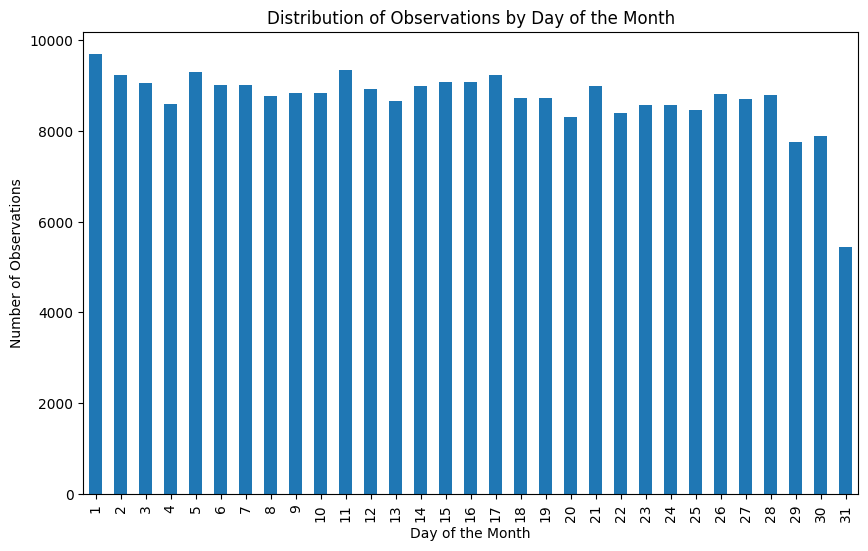

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df_observations_cleaned['date'].dt.day.value_counts().sort_index().plot(kind='bar')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Observations')
plt.title('Distribution of Observations by Day of the Month')
plt.show()

### Amount
Het 'amount' veld bevat naast het aantal waargenomen vogels, ook het gedrag. Dit nemen we echter niet mee in de oefening. We extraheren dus enkel het aantal waargenomen exemplaren.

In [23]:
df_observations_cleaned.groupby('amount').nunique().head(10)

species_id  species_name  \
amount                                                                         
1                                                            3             3   
1\n            \n            \n\n\n\n\n\n    \n...           1             1   
1\n            \n            \n\n\n\n\n\n    \n...           1             1   
1\n            \n            \n\n\n\n\n\n    \n...           1             1   
1\n            \n            \n\n\n\n\n\n    \n...           1             1   
1\n            \n            \n\n\n\n\n\n    \n...           1             1   
1\n            \n            \n\n\n\n\n\n    \n...           1             1   
1\n            \n            \n\n\n\n\n\n    \n...           1             1   
1\n            \n            \n\n\n\n\n\n    \n...           1             1   
1\n            \n            \n\n\n\n\n\n    \n...           1             1   

                                                    species_name_scientific  \
amount                                                                        
1                                                                         3   
1\n            \n            \n\n\n\n\n\n    \n...                        1   
1\n            \n            \n\n\n\n\n\n    \n...                        1   
1\n            \n            \n\n\n\n\n\n    \n...                        1   
1\n            \n            \n\n\n\n\n\n    \n...                        1   
1\n            \n            \n\n\n\n\n\n    \n...                        1   
1\n            \n            \n\n\n\n\n\n    \n...                        1   
1\n            \n            \n\n\n\n\n\n    \n...                        1   
1\n            \n            \n\n\n\n\n\n    \n...                        1   
1\n            \n            \n\n\n\n\n\n    \n...                        1   

                                                    validation  \
amount                                                           
1                                                            5   
1\n            \n            \n\n\n\n\n\n    \n...           1   
1\n            \n            \n\n\n\n\n\n    \n...           1   
1\n            \n            \n\n\n\n\n\n    \n...           1   
1\n            \n            \n\n\n\n\n\n    \n...           1   
1\n            \n            \n\n\n\n\n\n    \n...           1   
1\n            \n            \n\n\n\n\n\n    \n...           2   
1\n            \n            \n\n\n\n\n\n    \n...           2   
1\n            \n            \n\n\n\n\n\n    \n...           1   
1\n            \n            \n\n\n\n\n\n    \n...           1   

                                                    gps_coordinates  source  \
amount                                                                        
1                                                            186903      26   
1\n            \n            \n\n\n\n\n\n    \n...                1       1   
1\n            \n            \n\n\n\n\n\n    \n...                1       1   
1\n            \n            \n\n\n\n\n\n    \n...                1       1   
1\n            \n            \n\n\n\n\n\n    \n...                1       1   
1\n            \n            \n\n\n\n\n\n    \n...                2       2   
1\n            \n            \n\n\n\n\n\n    \n...                2       2   
1\n            \n            \n\n\n\n\n\n    \n...               12       4   
1\n            \n            \n\n\n\n\n\n    \n...                1       1   
1\n            \n            \n\n\n\n\n\n    \n...                1       1   

                                                    date  life_stage  \
amount                                                                 
1                                                   8857          19   
1\n            \n            \n\n\n\n\n\n    \n...     1           0   
1\n            \n            \n\n\n\n\n\n    \n...     1           0   
1\n            \n            \n\n\n\n\n\

In [24]:
df_observations_cleaned["amount"] = df_observations_cleaned["amount"].apply(lambda x: re.findall(r"\d+", x)[0]).astype(int) # only keep the amount and cast as int

### Species_id 
We zetten de species_id om naar een integer

In [25]:
df_observations_cleaned["species_id"] = df_observations_cleaned["species_id"].astype(int) # int parsing

### Location_id en Location
Er zijn waarnemingen die wel gps-coördinaten bevatten, maar geen locatie_id en locatie beschikbaar hebben. Vermits we zullen werken met de gps-coördinaten mogen deze waarnemingen in de dataset blijven. De location_id zullen we niet parsen naar een integer, vermits we veel NaN waarden hebben en we deze willen behouden. Het datatype blijft een float.

In [26]:
df_no_location = df_observations_cleaned[df_observations_cleaned['location_id'].isnull() | df_observations_cleaned['location'].isnull()]
df_no_location.count()

species_id                 4269
species_name               4269
species_name_scientific    4269
validation                 4269
gps_coordinates            4269
source                     3647
date                       4269
amount                     4269
life_stage                 4266
activity                   4266
location_id                   0
location                      0
observer_id                3411
observer_name              3411
counting_method            4269
method                     4269
latitude                   4269
longitude                  4269
accuracy_m                 3431
dtype: int64

### Validation

In [27]:
df_validation = df_observations_cleaned.groupby('validation').count().sort_values('species_id', ascending=False)
df_validation

species_id  species_name  \
validation                                                       
Goedgekeurd (automatische validatie)      236452        236452   
Goedgekeurd (aannemelijk)                  18041         18041   
Onbekend                                    8355          8355   
Goedgekeurd (met bewijs)                    6852          6852   
(nog) niet te beoordelen                     163           163   

                                      species_name_scientific  \
validation                                                      
Goedgekeurd (automatische validatie)                   236452   
Goedgekeurd (aannemelijk)                               18041   
Onbekend                                                 8355   
Goedgekeurd (met bewijs)                                 6852   
(nog) niet te beoordelen                                  163   

                                      gps_coordinates  source    date  amount  \
validation                                                                      
Goedgekeurd (automatische validatie)           236452  223194  236452  236452   
Goedgekeurd (aannemelijk)                       18041   15152   18041   18041   
Onbekend                                         8355    7623    8355    8355   
Goedgekeurd (met bewijs)                         6852    5927    6852    6852   
(nog) niet te beoordelen                          163     162     163     163   

                                      life_stage  activity  location_id  \
validation                                                                
Goedgekeurd (automatische validatie)      236042    236042       233252   
Goedgekeurd (aannemelijk)                  18021     18021        17244   
Onbekend                                    8352      8352         8151   
Goedgekeurd (met bewijs)                    6821      6821         6789   
(nog) niet te beoordelen                     161       161          158   

                                      location  observer_id  observer_name  \
validation                                                                   
Goedgekeurd (automatische validatie)    233252       235678         235678   
Goedgekeurd (aannemelijk)                17244        18040          18040   
Onbekend                                  8151         8272           8272   
Goedgekeurd (met bewijs)                  6789         6852           6852   
(nog) niet te beoordelen                   158          163            163   

                                      counting_method  method  latitude  \
validation                                                                
Goedgekeurd (automatische validatie)           236452  236452    236452   
Goedgekeurd (aannemelijk)                       18041   18041     18041   
Onbekend                                         8355    8355      8355   
Goedgekeurd (met bewijs)                         6852    6852      6852   
(nog) niet te beoordelen                          163     163       163   

                                      longitude  accuracy_m  
validation                                                   
Goedgekeurd (automatische validatie)     236452      226234  
Goedgekeurd (aannemelijk)                 18041       15135  
Onbekend                                   8355        3780  
Goedgekeurd (met bewijs)                   6852        6276  
(nog) niet te beoordelen                    163          57

In [28]:
insecure_observation_percentage = (df_validation.loc['Onbekend', 'species_id'] + df_validation.loc['(nog) niet te beoordelen', 'species_id']) * 100 / df_validation['species_id'].sum() 
print(f"Validation Onbekend of (nog) niet te beoordelen: {insecure_observation_percentage:.3} % ")

Validation Onbekend of (nog) niet te beoordelen: 3.16 % 


## Final check and write to parquet file

In [29]:
df_observations_cleaned.sort_values('date', ascending=True).head(20)

species_id species_name species_name_scientific validation  \
observation_id                                                               
71492261                70   Boomklever          Sitta europaea   Onbekend   
71492267                70   Boomklever          Sitta europaea   Onbekend   
71492306                70   Boomklever          Sitta europaea   Onbekend   
71506196                70   Boomklever          Sitta europaea   Onbekend   
168102627               70   Boomklever          Sitta europaea   Onbekend   
78367649                70   Boomklever          Sitta europaea   Onbekend   
137345918               70   Boomklever          Sitta europaea   Onbekend   
168102629               70   Boomklever          Sitta europaea   Onbekend   
137335809               70   Boomklever          Sitta europaea   Onbekend   
168102628               70   Boomklever          Sitta europaea   Onbekend   
168102631               70   Boomklever          Sitta europaea   Onbekend   
168102630               70   Boomklever          Sitta europaea   Onbekend   
137335518               70   Boomklever          Sitta europaea   Onbekend   
137344250               70   Boomklever          Sitta europaea   Onbekend   
168102632               70   Boomklever          Sitta europaea   Onbekend   
168097139               70   Boomklever          Sitta europaea   Onbekend   
168097140               70   Boomklever          Sitta europaea   Onbekend   
168102639               70   Boomklever          Sitta europaea   Onbekend   
168097141               70   Boomklever          Sitta europaea   Onbekend   
168097142               70   Boomklever          Sitta europaea   Onbekend   

                gps_coordinates                    source       date  amount  \
observation_id                                                                 
71492261        50.8914, 4.8302                       NaN 1930-09-28       2   
71492267        50.8914, 4.8302                       NaN 1931-03-15       1   
71492306        50.8914, 4.8302                       NaN 1931-10-24       1   
71506196        50.8914, 4.8302                       NaN 1935-10-12       4   
168102627       50.9115, 5.4174  Gebiedsdekkend ingevoerd 1945-10-16       1   
78367649        50.8486, 3.6375                      Site 1946-01-01       1   
137345918       51.1221, 5.2509  Gebiedsdekkend ingevoerd 1946-08-04       2   
168102629       51.1173, 5.2505  Gebiedsdekkend ingevoerd 1946-08-04       1   
137335809       51.1221, 5.2509  Gebiedsdekkend ingevoerd 1946-08-04       2   
168102628       51.1173, 5.2505  Gebiedsdekkend ingevoerd 1946-08-04       1   
168102631       50.8965, 5.5284  Gebiedsdekkend ingevoerd 1948-01-01       1   
168102630       50.8995, 5.6444  Gebiedsdekkend ingevoerd 1948-01-07       1   
137335518       51.0238, 5.2919  Gebiedsdekkend ingevoerd 1949-04-21       1   
137344250       51.0238, 5.2919  Gebiedsdekkend ingevoerd 1949-04-21       1   
168102632       50.9953, 5.1833  Gebiedsdekkend ingevoerd 1949-05-15       1   
168097139       50.9999, 5.2717                      Site 1952-03-29       1   
168097140       50.9999, 5.2717                      Site 1952-04-02       1   
168102639       51.1173, 5.2505  Gebiedsdekkend ingevoerd 1954-12-21       1   
168097141       50.9969, 5.2884                      Site 1957-05-15       1   
168097142       50.9969, 5.2884                      Site 1957-05-15       1   

               life_stage     activity  location_id  \
observation_id                                        
71492261         onbekend  ter plaatse      31037.0   
71492267         onbekend  ter plaatse      31037.0   
71492306         onbekend  ter plaatse      31037.0   
71506196         onbekend  ter plaatse      31037.0   
168102627        onbekend  ter plaatse          NaN   
78367649         onbekend  ter plaatse     108154.0   
137345918        onbekend  ter plaatse      23498.0   
168102629        onbekend  ter plaatse     

In [30]:
df_observations_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 269863 entries, 336194665 to 47673787
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   species_id               269863 non-null  int64         
 1   species_name             269863 non-null  object        
 2   species_name_scientific  269863 non-null  object        
 3   validation               269863 non-null  object        
 4   gps_coordinates          269863 non-null  object        
 5   source                   252058 non-null  object        
 6   date                     269863 non-null  datetime64[ns]
 7   amount                   269863 non-null  int64         
 8   life_stage               269397 non-null  object        
 9   activity                 269397 non-null  object        
 10  location_id              265594 non-null  float64       
 11  location                 265594 non-null  object        
 12  observer_id

In [31]:
df_observations_cleaned.to_parquet(f'./clean_data/observations_{species_id}_clean.parquet', index=True, engine="pyarrow")